## Overview
This is a Exploratory Data Analysis and Feature Engineering of Black Friday Sales data.

## Problem Statement/Opportunity
Analysis on the dataset to find out the affects of other columns on the purchase of the product.

### Installation
The Code is written in Python 3.6.10. If you are using a lower version of Python you can upgrade using the pip package, ensuring you have the latest version of pip.

### Importing libraries and loading datasets (Train and Test)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading and analyzing the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
print('df_train shape =', df_train.shape)
print('df_test shape =', df_test.shape)

df_train shape = (550068, 12)
df_test shape = (233599, 11)


### Merging both datasets before EDA

In [5]:
df = df_train.append(df_test)
print('df shape =',df.shape)

df shape = (783667, 12)


### EDA and Visualization

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# We don't have any need for 'User_ID' and 'Product_ID', therefore we will be dropping it
df.drop(columns = ['User_ID','Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
# Finding and filling null values
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

###### Since 'Product_Category_2' & 'Product_Category_3' have many null values, we will fill them for better understanding during visualization with '0'.

In [11]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

In [12]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [13]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [14]:
# Changing data types from 'float' to 'int'
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 59.8+ MB


### Note: We have merged both the datasets (Train and Test), therefore, the null values of the column 'Purchase' will later used to re-split the dataset.

## Visualization

In [16]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

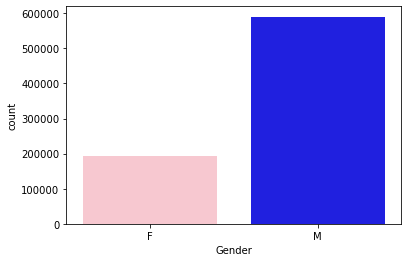

In [17]:
sns.countplot(df['Gender'], palette =sns.set_palette(["pink","blue"]))

### Observation:
Looking at the above countplot, we observe that we less females attended the black friday sales. But it could also mean less number of females paid for the products and may be their spouse paid for them.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

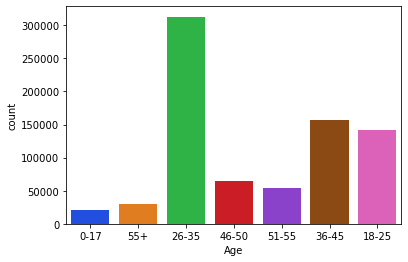

In [18]:
sns.countplot(df['Age'], palette = sns.color_palette('bright'))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

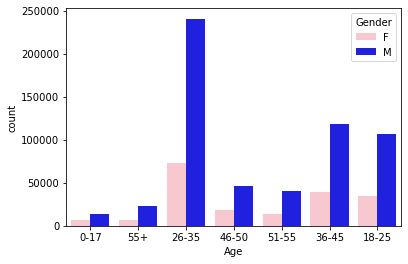

In [19]:
sns.countplot(df['Age'], hue = df['Gender'], palette = sns.set_palette(['pink', 'blue']))

### Observation:
On plotting a countplot for 'Age', we observe that the the majority population who attended the sales is between the age group of '26-35'. Adding 'Gender' in hue we can observe that, Males attended more as compared with Females.

In [20]:
G_M_combined = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(G_M_combined.unique())

['F_0' 'M_0' 'M_1' 'F_1']


    F_0 -> Female Unmarried
    M_0 -> Male Unmarried
    F_1 -> Female Married
    M_1 -> Male Married

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

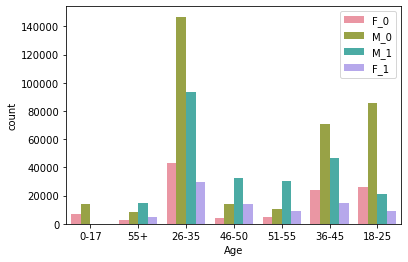

In [21]:
sns.countplot(df['Age'], hue = G_M_combined)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

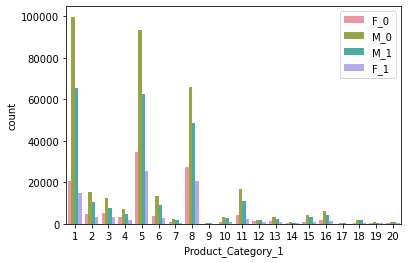

In [22]:
sns.countplot(df['Product_Category_1'], hue = G_M_combined)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

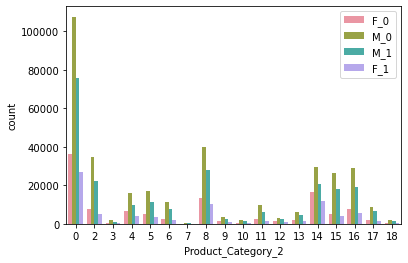

In [23]:
sns.countplot(df['Product_Category_2'], hue = G_M_combined)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

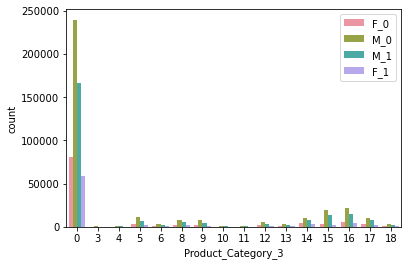

In [24]:
sns.countplot(df['Product_Category_3'], hue = G_M_combined)

### Observation:
With the help of 'Marital Status' we observe that:
1. 0-17 have no bars for the married which make sense.
2. 46 and above groups, females are very less.
3. Married males 46 and above are paying more comparing with married females.So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more.

If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

In [25]:
# sorted df by occupation and product_category_1
sorted_df = df.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Product_Category_1          420 non-null    int64
 1   Gender                      420 non-null    int64
 2   Age                         420 non-null    int64
 3   City_Category               420 non-null    int64
 4   Stay_In_Current_City_Years  420 non-null    int64
 5   Marital_Status              420 non-null    int64
 6   Product_Category_2          420 non-null    int64
 7   Product_Category_3          420 non-null    int64
 8   Purchase                    420 non-null    int64
dtypes: int64(9)
memory usage: 32.8 KB


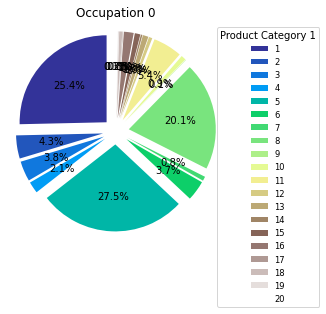

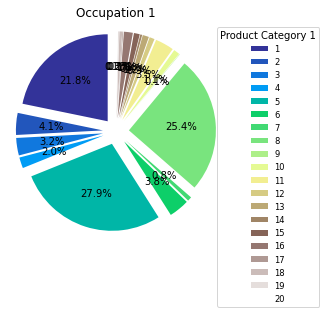

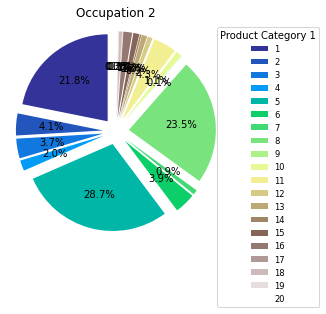

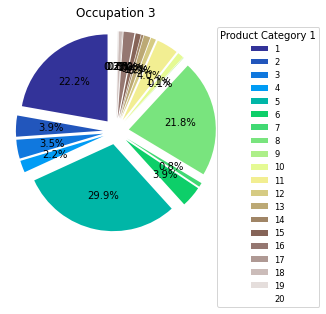

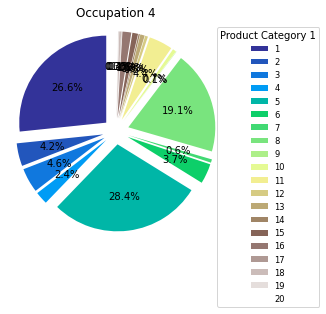

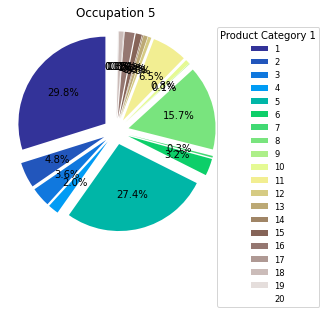

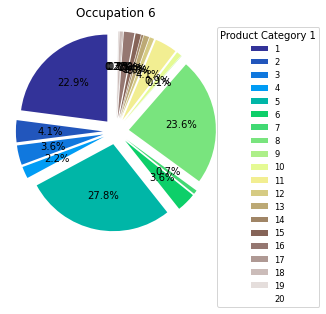

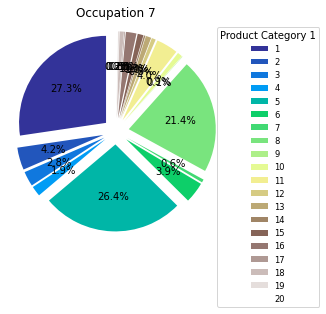

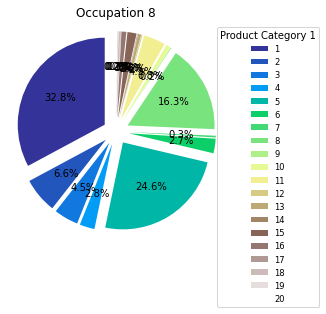

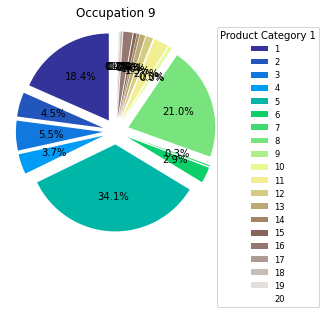

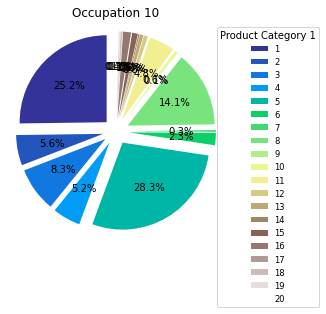

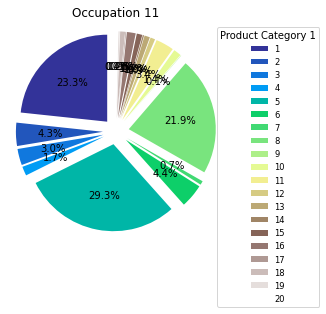

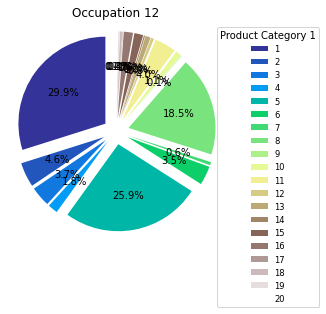

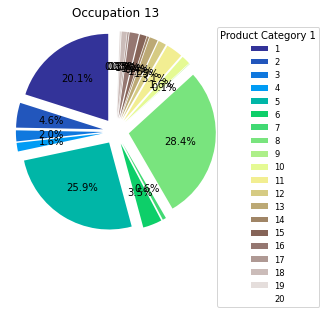

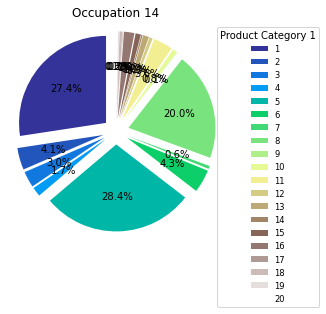

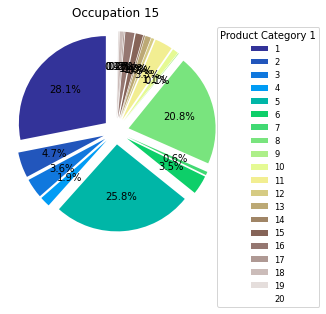

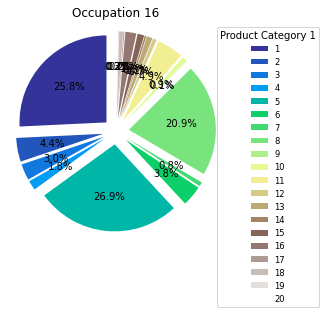

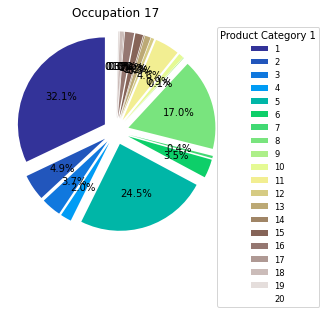

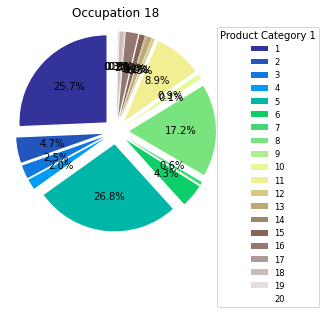

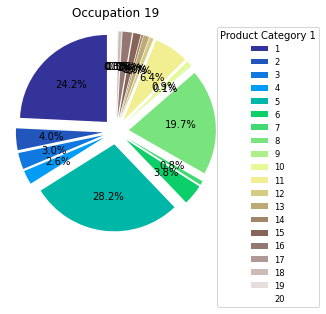

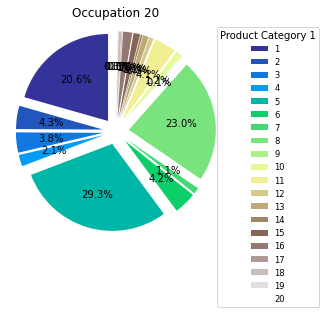

In [26]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product Category 1'
for i in range(21):
    explode = [0.15 for i in range(len(sorted_df['Gender'][i].to_numpy()))]
    a = plt.pie(sorted_df['Gender'][i].to_numpy(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(sorted_df['Product_Category_1'][0].to_numpy(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()

### Observation:
1. Irrespective of occupation the proportion of products being purchased is generic, i.e. category 1.
2. 5 is the most number bought by customers of any occupation and similary, 13-18 are bought in less numbers compared to total number bought.
3. If we look at category 1, it is most bought by customers with 8, 17, 5 occupations. This can be used when recommending a product on a platform where occupation of user is known.

Similar observation can be done for other categories. Specially when we don't actually know what those categories represent, such relation can help understand user purchasing patterns based on an known attribute (e.g. occupation).

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

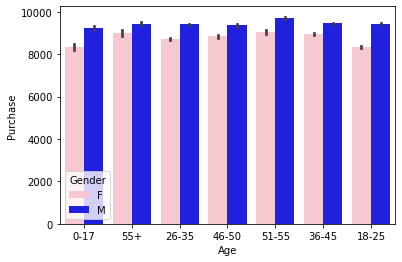

In [27]:
# Visualization Age and Purchase
sns.barplot('Age','Purchase', hue = 'Gender', data=df, palette = ['Pink', 'Blue'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

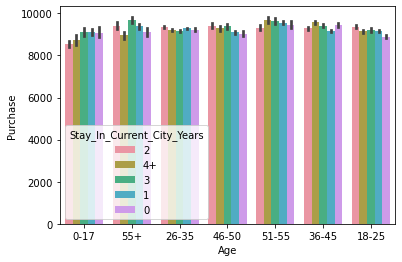

In [28]:
sns.barplot('Age', 'Purchase', hue = 'Stay_In_Current_City_Years', data = df )

### Observation:
1. Most money spent by 51-55 age group.
2. By adding 'Stay_In_Current_City_Years' in hue, we observe that people staying for 3 and above years in the current city average spends more on the sale.

## Product Categories VS Purchase

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

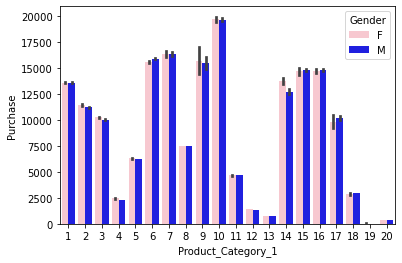

In [29]:
# Visualization Product_Category_1 VS Purchase
sns.barplot('Product_Category_1','Purchase', hue = 'Gender', data=df, palette = ['Pink', 'Blue'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

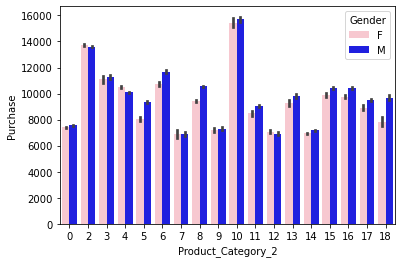

In [30]:
# Visualization Product_Category_2 VS Purchase
sns.barplot('Product_Category_2','Purchase', hue = 'Gender', data=df, palette = ['Pink', 'Blue'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

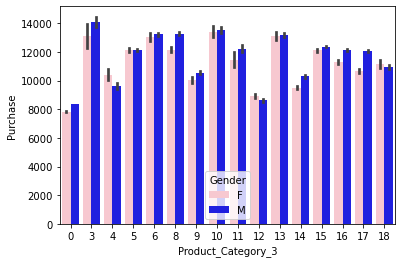

In [31]:
# Visualization Product_Category_3 VS Purchase
sns.barplot('Product_Category_3','Purchase', hue = 'Gender', data=df, palette = ['Pink', 'Blue'])

### Observation:
1. Product_Category_1: The most number purchased by a customer at a time is 10. Females buys slightly more than Males.
2. Product_Category_2: The most number purchased by a customer at a time is 10. Average number of males buys more than Females.
3. Product_Category_3: The most number purchased by a customer at a time is 3. Both Males and Females buys the product equally.

### Feature Engineering

In [32]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [33]:
## Categorical features(Gender, City_Category)
#1. Gender:
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,0,0,8370.0
1,0,0-17,10,A,2,0,1,6,14,15200.0
2,0,0-17,10,A,2,0,12,0,0,1422.0
3,0,0-17,10,A,2,0,12,14,0,1057.0
4,1,55+,16,C,4+,0,8,0,0,7969.0


In [34]:
#2. City_Category:
df['City_Category'] = df['City_Category'].map({'A':0,'B':1,'C':3})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,0,2,0,3,0,0,8370.0
1,0,0-17,10,0,2,0,1,6,14,15200.0
2,0,0-17,10,0,2,0,12,0,0,1422.0
3,0,0-17,10,0,2,0,12,14,0,1057.0
4,1,55+,16,3,4+,0,8,0,0,7969.0


In [35]:
## Ordinal Categories (Age, Stay_In_Current_City_Years,Product_Category_2, Product_Category_3)
#1. Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [36]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0,0,8370.0
1,0,1,10,0,2,0,1,6,14,15200.0
2,0,1,10,0,2,0,12,0,0,1422.0
3,0,1,10,0,2,0,12,14,0,1057.0
4,1,7,16,3,4+,0,8,0,0,7969.0


In [37]:
#2. Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [38]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0,0,8370.0
1,0,1,10,0,2,0,1,6,14,15200.0
2,0,1,10,0,2,0,12,0,0,1422.0
3,0,1,10,0,2,0,12,14,0,1057.0
4,1,7,16,3,4,0,8,0,0,7969.0


In [39]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

### Changing data types

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 79.8+ MB


In [41]:
# Since 'Stay_In_Current_City_Years' is in object data type we will change it into 'int'
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int32(3), int64(6)
memory usage: 76.8 MB


In [46]:
# Seprating the dataset back to train and test datasets
df_test = df[df['Purchase'].isnull()]

In [47]:
df_test.shape

(233599, 10)

In [49]:
df_train = df[~df['Purchase'].isnull()]

In [50]:
df_train.shape

(550068, 10)

In [51]:
# Splitting the dataset in independent and dependent features
X = df_train.drop('Purchase', axis = 1)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,0,0
1,0,1,10,0,2,0,1,6,14
2,0,1,10,0,2,0,12,0,0
3,0,1,10,0,2,0,12,14,0
4,1,7,16,3,4,0,8,0,0


In [52]:
y = df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [53]:
X.shape

(550068, 9)

In [54]:
y.shape

(550068,)

In [55]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.33, random_state=42)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)